# Data Preprocessing Assessment

### DUE: Tuesday, 11 October 2022, 23:59

This Jupyter notebook guides you through crucial steps in data preprocessing, which you will need for your IVDA projects. This includes, inter alia, handling missing values, grouping, mapping, and normalizing data.

Here's the link to the questionnaire, which includes documentation for every question in your dataset: https://data.mendeley.com/datasets/88y3nffs82/5/files/c5f122b0-0380-42e7-9930-3d85ee083a06.

## Grading Schema: 

You will be graded by the outcome of your code, not the code (quality) itself. Additionally, your written answers will be graded. Your assigned tasks and questions are highlighted in **bold** for you.

*   **For plots:** Remember to add titles, legends, axes descriptions, etc. It is recommended you use the *plotly* library.
*   Please answer as concisely as possible while using full sentences
*  You can get up to 10 points for this exercise. To be transparent we added the weight of each exercise in percentage. Distribute your effort accordingly. 
* Solutions will be provided after the deadline.

**Note**: don't use pandas-profiling for this week's assessment. This week's goal is to learn the abilities and limits of the tools demonstrated below, to enable you to be knowledgeable about the iterative process of wrangling. However, you can try to use it to confirm your findings, if you desire. We do not require this, nor will we mark it as part of your submission.


We start by importing the neccessary packages. **Please do not import additional packages in this notebook.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
import plotly.express as px
import plotly.graph_objects as go

Import the data from the url:  https://raw.githubusercontent.com/akkuebler/ivda_dataprocessing/main/preppedStudentCovidData.csv'

Note that you will want to have the responding student's number as your dataframe's index. 

In [2]:
url = 'https://raw.githubusercontent.com/akkuebler/ivda_dataprocessing/main/preppedStudentCovidData.csv'
df = pd.read_csv(url)
df_org = df.copy()

Display the first 5 rows of your dataset.

In [3]:
# display first rows
df.head()

,Unnamed: 0,Q1,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10a,...,Q38h_2,Q38i_2,Q38j_2,Q38k_2,Q38l_2,Q38m_2,Q38n_2,Q38o_2,Q38p_2,SOURCE
0,29349,Turkey,1.0,1.0,1.0,1.0,24.0,1.0,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tr
1,23415,Portugal,1.0,1.0,1.0,3.0,NaN,1.0,2.0,4.0,...,1.0,3.0,5.0,4.0,3.0,5.0,1.0,2.0,2.0,pt
2,5568,Croatia,1.0,1.0,1.0,2.0,20.0,2.0,2.0,3.0,...,5.0,1.0,1.0,4.0,2.0,2.0,1.0,1.0,2.0,en
3,10176,Hungary,1.0,1.0,1.0,3.0,21.0,1.0,2.0,3.0,...,5.0,1.0,3.0,4.0,4.0,3.0,1.0,3.0,1.0,en
4,2226,Bangladesh,1.0,1.0,2.0,1.0,NaN,1.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en


# Task 1 - Handling duplicates & mapping Data (27.5 %)
## Task 1.1 
**Make yourself familiar with the data's shape and size**

In [4]:
print("The dataset contains {} data records and {} features.".format(df.shape[0], df.shape[1]))

The dataset contains 10000 data records and 162 features.


Read through all the tasks in this notebook, and create a list of all the questions in the questionaire which are relevant for your assigned data analysis tasks (link to the questionnaire is on the exercise slides). Note that the answer to each question is stored in a column. In this assessment's context, we refer to those columns as *attributes* or *features*.

## Task 1.2
**Give basic summary statistics for the questions you've identified as relevant, and state which of these questions has the most missing data. 2.5 %**

In [5]:
# summary statistics
df.describe()

,Unnamed: 0,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10a,Q10b,...,Q38g_2,Q38h_2,Q38i_2,Q38j_2,Q38k_2,Q38l_2,Q38m_2,Q38n_2,Q38o_2,Q38p_2
count,10000.00000,9517.000000,9493.000000,9430.000000,9305.000000,8024.000000,9565.000000,9004.000000,6504.000000,5283.000000,...,6160.000000,6162.000000,5967.000000,6103.000000,6150.000000,6160.000000,6135.000000,6136.000000,6140.000000,6148.000000
mean,16030.24370,1.066723,1.115559,1.242842,2.637077,23.546735,1.674647,1.947912,3.324416,3.297369,...,2.666558,3.481337,2.459695,3.486482,4.141301,4.316883,3.172779,2.228488,2.819707,1.986337
std,9121.70385,0.249554,0.319712,0.523890,0.924109,5.677028,0.516307,0.362120,1.104941,1.146570,...,1.314062,1.593097,1.317388,1.640035,1.282646,1.116777,1.174868,1.369814,1.290348,1.009379
min,0.00000,1.000000,1.000000,1.000000,1.000000,18.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,8494.75000,1.000000,1.000000,1.000000,2.000000,20.000000,1.000000,2.000000,3.000000,3.000000,...,1.000000,2.000000,1.000000,2.000000,4.000000,4.000000,2.000000,1.000000,2.000000,1.000000
50%,16018.00000,1.000000,1.000000,1.000000,3.000000,22.000000,2.000000,2.000000,4.000000,3.000000,...,3.000000,4.000000,2.000000,4.000000,5.000000,5.000000,3.000000,2.000000,3.000000,2.000000
75%,23890.25000,1.000000,1.000000,1.000000,3.000000,24.000000,2.000000,2.000000,4.000000,4.000000,...,4.000000,5.000000,3.000000,5.000000,5.000000,5.000000,4.000000,3.000000,4.000000,2.000000
max,95955.00000,2.000000,2.000000,3.000000,4.000000,70.000000,4.000000,3.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [6]:
# Which question has the most missing data?
col_nan_sum = dict(df.isnull().sum())
max_nan_col = list(col_nan_sum.keys())[0]
max_missing = col_nan_sum[max_nan_col]
for k in col_nan_sum.keys():
    if col_nan_sum[k] > max_missing:
        max_nan_col = k
        max_missing = col_nan_sum[k]

print('The question with the most missing data & its number of missing data: {} - {}'.format(max_nan_col, max_missing))

The question with the most missing data & its number of missing data: Q34 - 8234


## Task 1.3
When working with data, we should be concerned not just by missing data, but also by duplicated rows. **Now, check your dataset from above for duplicates, and delete all but the first entry.**

*Hint: Be aware that the dataset contains duplicate indices. The indices function as a unique student number for every student.*

In [7]:
# Check for duplicates
print('There are {} duplicated rows '.format(df.duplicated(subset = ['Unnamed: 0'], keep='first').sum()))
df = df.drop_duplicates(subset = ['Unnamed: 0'], keep = 'first')

There are 1562 duplicated rows 


**Why can you not simply use `df.drop_duplicates(keep ='first')`? What would happen in this case? (Max. 50 words).** **5 %**

Since each row in the data frame is distinguished by the unique student number, it is important to consider 'Unnamed: 0' for identifying duplicates. If we use df.drop_duplicates(keep = 'first'), the function will use all columns by default. Consequently, it would result in deleting some of the unique student number.

In [8]:
print("After handling duplicates, the dataset now contains {} data records and {} features.".format(df.shape[0], df.shape[1]))

After handling duplicates, the dataset now contains 8438 data records and 162 features.


## Task 1.4
**Create a pie chart visualization describing the ratio of responses from each country in your dataset. For now, do not perform any additional clean-up of your data. 5 %**

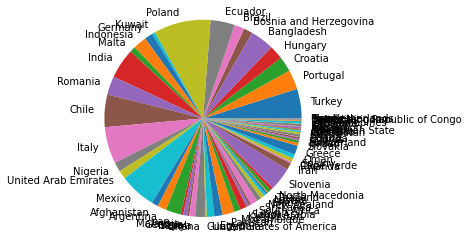

In [9]:
c = list(df["Q1"])
def counting_as_dict(c):
    ###################################################
    ##### YOUR CODE STARTS HERE #######################
    ###################################################
    dic = {}
    for e in c:
        if e in dic:
            dic[e] += 1
        else:
            dic[e] = 1
    return dic
    ###################################################
    ##### YOUR CODE ENDS HERE #########################
    ###################################################    

def plot_pie(dictionary):
    ###################################################
    ##### YOUR CODE STARTS HERE #######################
    ###################################################
    dic_keys = []
    count = []
    for k,v in dictionary.items():
        dic_keys.append(k)
        count.append(v)

    # Plot
    plt.pie(count, labels = dic_keys)
    plt.axis('equal')
    plt.show()
    ###################################################
    ##### YOUR CODE ENDS HERE #########################
    ###################################################

d = counting_as_dict(c)
plot_pie(d)

As you can see, the plot is very cluttered. To reduce this clutter, we could instead create and plot a set of logical groupings-- in the case of our data here, these groupings could be continents. **Try to map the countries to the respective continents using the provided `continent.csv` file (https://raw.githubusercontent.com/akkuebler/ivda_dataprocessing/main/continents.csv), and then plot it again. 5 %**

In [10]:
url2 = 'https://raw.githubusercontent.com/akkuebler/ivda_dataprocessing/main/continents.csv'
continents = pd.read_csv(url2)

*Hint: Turn the `continents` dataframe into a dictionary you can use for mapping.*

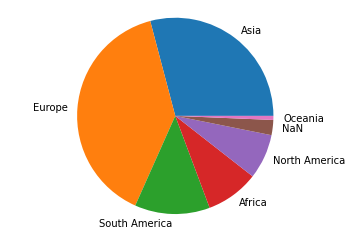

In [11]:
# Mapping
cont_dic = continents.to_dict(orient = 'records')
cont_dic_map = {}
for e in cont_dic:
    cont_dic_map[e['country']] = e['continent']

def country_by_continent(dfcol):
    isnan = list(dfcol.isna())
    q1 = list(dfcol)
    cont_lst = []
    for i in range(len(q1)):
        if isnan[i] == True:
            cont_lst.append('NaN')
        elif q1[i] == 'United States of America':
            cont_lst.append('North America')
        elif q1[i] == 'Palestinian State' or q1[i] == 'The Philippines':
            cont_lst.append('Asia')
        elif q1[i] == 'Democratic Republic of Congo':
            cont_lst.append('Africa')
        elif q1[i] == 'The Netherlands':
            cont_lst.append('Europe')
        else:
            cont_lst.append(cont_dic_map[q1[i]])
    return cont_lst

# Visualization
d = counting_as_dict(country_by_continent(df.Q1))
plot_pie(d)

**Inspect the pie chart and the dataframe: Why do you see some 4-5% missing values? Where does these rows come from? (Max. 50 words).** **5 %**

In [12]:
print(df.Q1.describe())
print('The number of missing values in Q1:', df.Q1.isnull().sum())

count       8228
unique        77
top       Poland
freq         790
Name: Q1, dtype: object
The number of missing values in Q1: 210



```
YOUR RESPONSE HERE
```
The missing values come from people who did not respond to Q1. Hence, it resulted in a few percentages of NaN in the pie chart. As you can see above, the total number of missing values is 210.



**Apply your findings from the question above to further reduce the amount of missing data. Plot the pie chart again. 5 %**

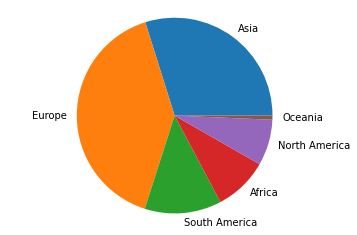

In [13]:
#Further reduce missing data
df = df[~df.Q1.isnull()]

# Map and visualize again
d = counting_as_dict(country_by_continent(df.Q1))
plot_pie(d)

Please note: from the perspective of visuzalization theory, pie charts are not ideal. This is because humans do not do well when asked to estimate quantities within (and across) pie charts with spatial disarray. As Edward Tufte once wrote: 

    "... the only worse design than a pie chart is several of them.” 
    
    Tufte. (2015). The visual display of quantitative information (Second edition, ninth printing). Graphics Press.

In our context, we use pie charts only for the purpose of visualizing the progress we make in our grouping of the data. Since we do not set out to express some subtle findings to a reader, our use case is sufficiently simple for a pie chart. Do not use pie charts in your upcoming group projects.

# Task 2 - Handling and treating missing values (35 %)
## Task 2.1
**Visualize the age of the students in your dataset with an appropriate boxplot and histogram. With regards to the visualizations' treatment of missing data, what issues do you encounter here? 2 %**

In the boxplot, as it visualises the frequency of each age,it is difficult to recognise whether it contains the frequency of missing values. However, as the histogram reveals age and frequency, it is clear that nan is included in the dataset. Also, the missing values appear the most frequently among all categories.


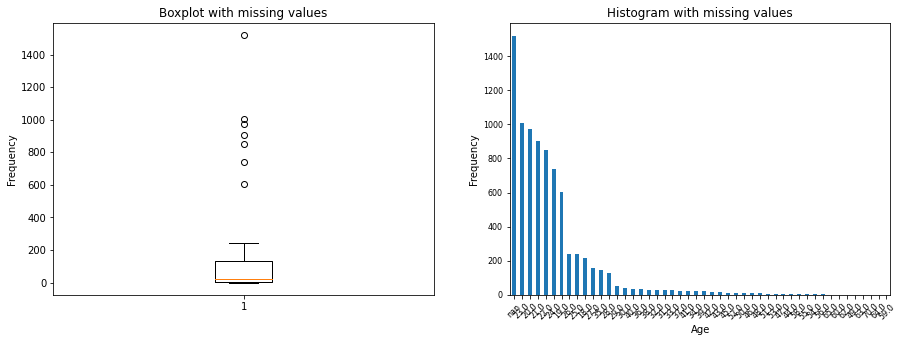

In [14]:
# Visualize
counts = df['Q7'].value_counts(dropna = False)
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (15,5))
ax1.boxplot(counts)
ax1.set_ylabel('Frequency')
ax1.set_title('Boxplot with missing values')
counts.plot(kind = 'bar', title = 'Histogram with missing values', xlabel='Age', ylabel='Frequency', rot = 45, fontsize=8)

# What problems do you notice in your visualizations?
print('In the boxplot, as it visualises the frequency of each age,it is difficult to recognise whether it contains the frequency of missing values. However, as the histogram reveals age and frequency, it is clear that nan is included in the dataset. Also, the missing values appear the most frequently among all categories.')

**Now, filter out missing data using `np.isnan()`, and run your visualization code again. 3 %**

*Hint: If you are working on your local machine, you might want use `from plotly.offline import plot` together with `plot(fig)`. This creates a locally-stored HTML that is then opened within your web browser.*

<AxesSubplot:title={'center':'Histogram wihtout missing values'}, xlabel='Age', ylabel='Frequency'>

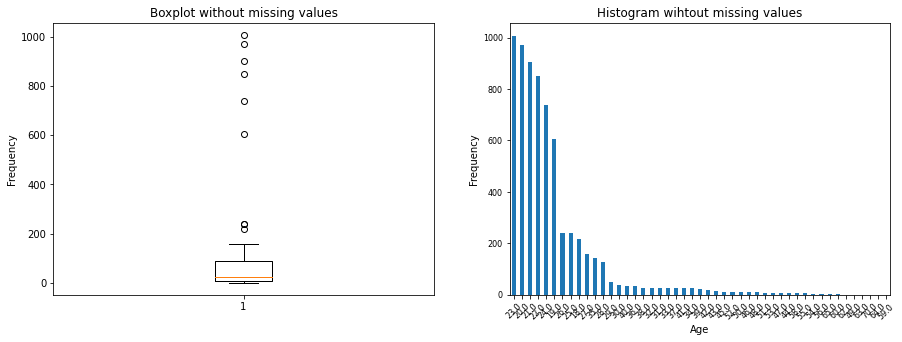

In [15]:
# Filter data using np.isnan
df = df[~np.isnan(df['Q7'])]
count_new = df.Q7.value_counts()
# Visualize
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (15,5))
ax1.boxplot(count_new)
ax1.set_ylabel('Frequency')
ax1.set_title('Boxplot without missing values')
count_new.plot(kind = 'bar', title = 'Histogram wihtout missing values', xlabel='Age', ylabel='Frequency', rot = 45, fontsize=8)

## Task 2.2
Inspect your dataset again. We still have to deal with some missing data!
 
Now you must come up with a strategy to reduce your (reduced) dataset's missing values, so that you can continue your work on a nice, clean dataset.

*Hint: In general, there are 3 different ways to handle missing data:* 
1. *Ignoring on purpose (as we did above)*
2. *Deleting entire entries (rows) or features (columns) with missing data, or deleting entire features when missing data reaches a certain threshold (i.e. ignoring them in your analysis)*
3. *Imputing missing data with the feature's mean or median, or treat a missing value as seperate category (when the feature is categorical).* 

*But remember: All of the described ways above are data type- and context-dependent!*

## Task 2.2.1
**Drop rows where all data is missing. Note that, since our index is the unique student number, we should NOT reset the index here. 5 %**

In [16]:
print("The dataset before dropping the rows contains {} data records and {} features.".format(df.shape[0], df.shape[1]))

# drop rows with missing data
#df.isnull().all(axis = 1).sum() # Result: 0
df = df.dropna(subset = ['Unnamed: 0'], how = 'all')
print("The dataset now contains {} data records and {} features.".format(df.shape[0], df.shape[1]))

The dataset before dropping the rows contains 6711 data records and 162 features.
The dataset now contains 6711 data records and 162 features.


## Task 2.2.2
This task is about Q7 (Age).

**Impute the missing values with the feature mean, and visualize again the age of the students in your dataset with an appropriate boxplot and histogram. 5 %**

Original Data : 
 count    8024.000000
mean       23.546735
std         5.677028
min        18.000000
25%        20.000000
50%        22.000000
75%        24.000000
max        70.000000
Name: Q7, dtype: float64 

Imputed Data : 
 count    10000.000000
mean        23.546735
std          5.085237
min         18.000000
25%         21.000000
50%         23.000000
75%         24.000000
max         70.000000
Name: Q7, dtype: float64


<AxesSubplot:title={'center':'Histogram with imputing'}, ylabel='Frequency'>

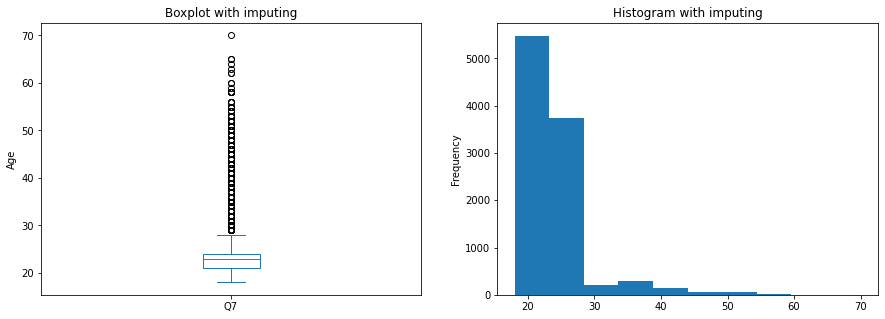

In [17]:
##########################################################################################################################
# As the result of df.Q7.isna().sum() = 0, the original dataset of size (10000, 162) was used in this task for the sake of 
# showing the difference between the one with the imputed mean and the one ignoring missing values.
##########################################################################################################################
df_impute = df_org.copy()
df_no_impute = df_org.copy()
print("Original Data : \n", df_impute.Q7.describe(), "\n")

# impute missing values
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
df_impute['Q7'] = imp_mean.fit_transform(df_impute['Q7'].values.reshape(-1,1))
print("Imputed Data : \n", df_impute.Q7.describe())

# Visualize
plt.subplots(2,2, figsize = (15,5))
plt.subplot(1, 2, 1) # row 1, col 2 index 1
df_impute.Q7.plot(kind = 'box', title = 'Boxplot with imputing', ylabel='Age')

plt.subplot(1, 2, 2) # index 2
df_impute.Q7.plot(kind = 'hist', title = 'Histogram with imputing', xlabel='Age', ylabel='Frequency')

**Show the graphs with the imputed and ignored datasets in one graph (in total, there should be 2 histograms and 2 boxplots). Model your visualization after the example below, and annotate each approach's mean, so that easy comparison between approaches is possible. 10 %**

[IMAGE](https://github.com/akkuebler/ivda_dataprocessing/blob/main/annotation_means_%20example.png)

Text(0.5, 1.0, 'Histogram (no impute): mean = 23.55')

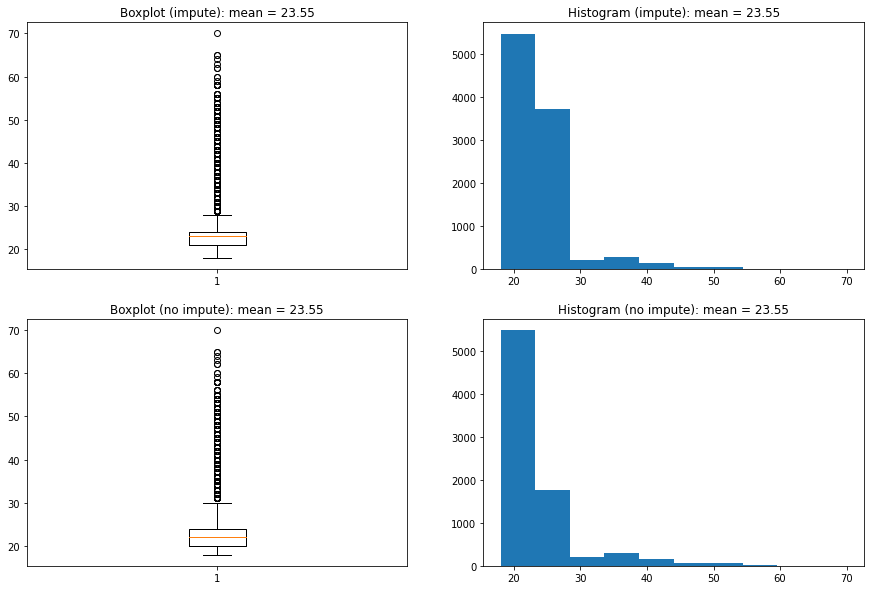

In [18]:
# Visualize
df_no_impute = df_no_impute[~np.isnan(df_no_impute['Q7'])]

fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2, 2, figsize=(15, 10))
ax1.boxplot(df_impute.Q7)
ax1.set_title('Boxplot (impute): mean = '+ str(round(np.mean(df_impute.Q7),2)))
ax2.hist(df_impute.Q7)
ax2.set_title('Histogram (impute): mean = '+ str(round(np.mean(df_impute.Q7),2)))
ax3.boxplot(df_no_impute.Q7)
ax3.set_title('Boxplot (no impute): mean = '+ str(round(np.mean(df_no_impute.Q7),2)))
ax4.hist(df_no_impute.Q7)
ax4.set_title('Histogram (no impute): mean = '+ str(round(np.mean(df_no_impute.Q7),2)))

**Shortly describe the graph. What can you infer from it? Do the boxplots and histograms differ? If so, explain why. (Max. 100 words).** **5 %**

    YOUR RESPONSE HERE
The overall shapes of boxplots look similar. However, as you can see from the yellow lines of the two boxplots, Q2 of both graphs are different. The boxplot with the imputed mean indicates that 50% of the data is 23, while the one ignoring the missing values indicates that 50% is 22. Moreover, since the imputed mean is roughly 23.55, the height for x = 25 is higher in the histogram with the imputed mean value than another one. Also, because of the distribution, the height of the histogram between 55-60 is more visible at the one ignoring missing values.

## Task 2.2.3
This task is about Q4 (Student Status).

**As this is categorical data, you will form a new category for the missing data and name it *'unsanswered'*.
Then, create a plot for each age group stated below describing the proportion of students who have attended school full-time and part-time. 5 %**

*Age groups are: 18-28 and 29-38 and 39+*

array([<AxesSubplot:ylabel='18-28'>, <AxesSubplot:ylabel='29-38'>,
       <AxesSubplot:ylabel='39+'>], dtype=object)

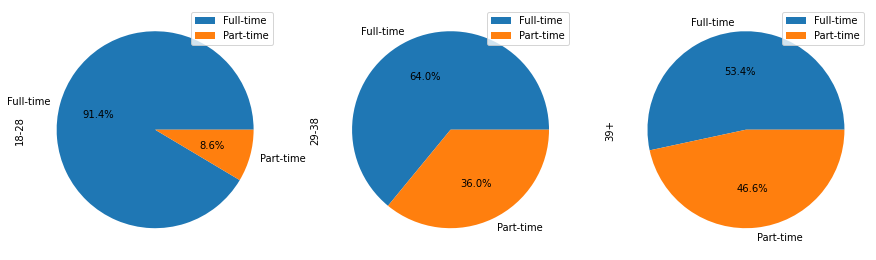

In [19]:
# Form new category named "unanswered"
df['Q4'].mask(df['Q4'] == 1.0, 'Full-time', inplace = True)
df['Q4'].mask(df['Q4'] == 2.0, 'Part-time', inplace = True)
df['Q4'].mask(df['Q4'] == np.nan, 'Unanswered', inplace = True)

df = df[~np.isnan(df['Q7'])]
def calculate_age_group(row):
    if row['Q7'] >= 18 and row['Q7'] <= 28:
        return '18-28'
    elif row['Q7'] >= 29 and row['Q7'] <= 38:
        return '29-38'
    else:
        return '39+'
df['age_group'] = df.apply(lambda row: calculate_age_group(row), axis=1)

# Visualize
df.groupby('Q4').age_group.value_counts().unstack().plot.pie(subplots = True, figsize=(15, 10), legend=True, autopct='%1.1f%%')


# Task 3 (12.5 %) - Grouping data & colour coding
Visualize students' perception of how their workload has changed since in-person classes were cancelled. Group the data depending on whether the student is a full-time or a part-time student. The associated questions in the questionaire are Q17 and Q4.

In [21]:
# Handling missing data
df = df.dropna(subset=['Q4','Q17'])
print('The number of missing values in Q4:', df.Q4.isna().sum())
print('The number of missing values in Q17:', df.Q17.isna().sum())

The number of missing values in Q4: 0
The number of missing values in Q17: 0


**How are you handling missing data here? Explain your choice. (Max. 50 words)** **2.5 %**


```
YOUR RESPONSE HERE
```
Since both Q4 and Q17 are categorical variables, it is better to drop the missing values than fill them. The process for the exclusion of missing data started from Q4, and then with the rest of the data, np.nan in Q17 was dropped.

**Use an appropriate stacked bar chart as visualization. Plot it two times, once with a two-sided gradient color scheme in red/green, and the other time using the following colours: https://coolors.co/a4161a-e5383b-ffffff-f5f3f4-b1a7a6. 7.5 %**

In [23]:
# Visualizations
df['Q4'].mask(df['Q4'] == 1.0, 'Full-time', inplace = True)
df['Q4'].mask(df['Q4'] == 2.0, 'Part-time', inplace = True)
df['Q17'].mask(df['Q17'] == 1.0, 'significantly smaller', inplace = True)
df['Q17'].mask(df['Q17'] == 2.0, 'smaller', inplace = True)
df['Q17'].mask(df['Q17'] == 3.0, 'the same', inplace = True)
df['Q17'].mask(df['Q17'] == 4.0, 'larger', inplace = True)
df['Q17'].mask(df['Q17'] == 5.0, 'significantly larger', inplace = True)

status = ['Full-time', 'Part-time']
fig1 = go.Figure(data=[
    go.Bar(name='significantly smaller', x=status, y=[430, 38]),
    go.Bar(name='smaller', x=status, y=[685, 80]),
    go.Bar(name='the same', x=status, y=[1061, 131]),
    go.Bar(name='larger', x=status, y=[1320, 170]),
    go.Bar(name='significantly larger', x=status, y=[854, 94])
])
fig1.update_layout(barmode = 'stack', title = 'Workload by status: red/green')
fig1.show()

fig2 = go.Figure(data=[
    go.Bar(name='significantly smaller', x=status, y=[430, 38], marker_color = 'rgb(164,22,26)'),
    go.Bar(name='smaller', x=status, y=[685, 80], marker_color = 'rgb(229,56,59)'),
    go.Bar(name='the same', x=status, y=[1061, 131], marker_color = 'rgb(255,255,255)'),
    go.Bar(name='larger', x=status, y=[1320, 170], marker_color = 'rgb(245,243,244)'),
    go.Bar(name='significantly larger', x=status, y=[854, 94], marker_color = 'rgb(177,167,166)')
])
fig2.update_layout(barmode = 'stack', title = 'Workload by status: selected colour scheme')
fig2.show()

**Discuss the pros and cons of the second colour scheme, and why it might sometimes not be appropriate to use. (Max. 50 words)**  **2.5 %**


```
YOUR RESPONSE HERE
```
Firstly, it is difficult to distinguish between variables with similar colours. For instance, it is difficult to differentiate 'the same' and 'larger' from each other as they both have whiteish colours. Also, as it is not a gradient, it is hard to express the ordinal variable, in this case, workload.

# Task 4 (25 %) - Normalizing data & colour coding
In this last task, you will build an "emotional satisfaction score" (ESS) using the data from Q25. 

To do this, you will group the data into positive and negative feelings, sum up the relevant features, and then normalize the results to a scale of 0 to 1. Use the value for the given categorical data item in Q25 as a measure of "emotional intensity" (i.e. 'Never'= 1 and 'Always'= 5). Our "emotional satisfaction score" attempts to balance out positive and negative emotions, and so you will calculate it using the formula: 

    ESS = (positive emotions score sum) - (negative emotions score sum) 

Afterwards, use an appropriate colour-coded plot to show differences between Bachelor, Masters, and PhD students, using responses from Q5.

**Plot: 20 %**

The dataset contains 4863 data records and 163 features.
The dataframe after removing rows with NaN value in the specified columns contains 4413 data records and 163 features.
              Q25a         Q25b         Q25c         Q25d         Q25e  \
count  4413.000000  4413.000000  4413.000000  4413.000000  4413.000000   
mean      2.860412     3.144346     2.694539     3.353728     2.952640   
std       1.055360     1.103963     1.149149     1.053298     1.076315   
min       1.000000     1.000000     1.000000     1.000000     1.000000   
25%       2.000000     2.000000     2.000000     3.000000     2.000000   
50%       3.000000     3.000000     3.000000     3.000000     3.000000   
75%       4.000000     4.000000     3.000000     4.000000     4.000000   
max       5.000000     5.000000     5.000000     5.000000     5.000000   

              Q25f         Q25g         Q25h         Q25i         Q25j  
count  4413.000000  4413.000000  4413.000000  4413.000000  4413.000000  
mean      3

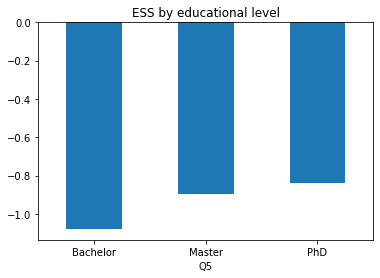

In [31]:
print("The dataset contains {} data records and {} features.".format(df.shape[0], df.shape[1]))

# Handling missing data
df_work_emotion = df.dropna(subset=['Q25a', 'Q25b', 'Q25c', 'Q25d', 'Q25e', 'Q25f', 'Q25g', 'Q25h', 'Q25i', 'Q25j']).copy()
print("The dataframe after removing rows with NaN value in the specified columns contains {} data records and {} features.".format(df_work_emotion.shape[0], df_work_emotion.shape[1]))

# Summarize specific columns
col = ['Q25a', 'Q25b', 'Q25c', 'Q25d', 'Q25e', 'Q25f', 'Q25g', 'Q25h', 'Q25i', 'Q25j']
print(df_work_emotion[col].describe())

# Normalize new columns
# zi = (xi – min(x)) / (max(x) – min(x))
min = np.min(df_work_emotion['Q25a'])
max = np.max(df_work_emotion['Q25a'])
df_work_emotion['Q25a'] = (df_work_emotion['Q25a']-min) / (max-min)

min = np.min(df_work_emotion['Q25b'])
max = np.max(df_work_emotion['Q25b'])
df_work_emotion['Q25b'] = (df_work_emotion['Q25b']-min) / (max-min)

min = np.min(df_work_emotion['Q25c'])
max = np.max(df_work_emotion['Q25c'])
df_work_emotion['Q25c'] = (df_work_emotion['Q25c']-min) / (max-min)

min = np.min(df_work_emotion['Q25d'])
max = np.max(df_work_emotion['Q25d'])
df_work_emotion['Q25d'] = (df_work_emotion['Q25d']-min) / (max-min)

min = np.min(df_work_emotion['Q25e'])
max = np.max(df_work_emotion['Q25e'])
df_work_emotion['Q25e'] = (df_work_emotion['Q25e']-min) / (max-min)

min = np.min(df_work_emotion['Q25f'])
max = np.max(df_work_emotion['Q25f'])
df_work_emotion['Q25f'] = (df_work_emotion['Q25f']-min) / (max-min)

min = np.min(df_work_emotion['Q25g'])
max = np.max(df_work_emotion['Q25g'])
df_work_emotion['Q25g'] = (df_work_emotion['Q25g']-min) / (max-min)

min = np.min(df_work_emotion['Q25h'])
max = np.max(df_work_emotion['Q25h'])
df_work_emotion['Q25h'] = (df_work_emotion['Q25h']-min) / (max-min)

min = np.min(df_work_emotion['Q25i'])
max = np.max(df_work_emotion['Q25i'])
df_work_emotion['Q25i'] = (df_work_emotion['Q25i']-min) / (max-min)

min = np.min(df_work_emotion['Q25j'])
max = np.max(df_work_emotion['Q25j'])
df_work_emotion['Q25j'] = (df_work_emotion['Q25j']-min) / (max-min)

# Calculate final emotional satisfaction score
# positive = joyful (Q25a), hopeful (Q25b), proud (Q25c), relieved (Q25h) / negative: rest
positive = col[:3]
positive.append('Q25h')
negative = col[3:]
negative.remove('Q25h')

def calculate_ESS(row):
    positive_score = 0
    for e in positive:
        positive_score += row[e]
    negative_score = 0
    for e in negative:
        negative_score += row[e]
    ESS = positive_score - negative_score
    return ESS

df_work_emotion['ESS'] = df_work_emotion.apply(calculate_ESS, axis=1)

# Group by Q5, calculate average
df_work_emotion['Q5'].mask(df_work_emotion['Q5'] == 1.0, 'Bachelor', inplace = True)
df_work_emotion['Q5'].mask(df_work_emotion['Q5'] == 2.0, 'Master', inplace = True)
df_work_emotion['Q5'].mask(df_work_emotion['Q5'] == 3.0, 'PhD', inplace = True)
data = df_work_emotion.groupby('Q5').ESS.mean()
data = data.to_dict()

# Visualization
df_work_emotion.groupby('Q5').ESS.mean().plot.bar(rot = 0, title = 'ESS by educational level')
fig = go.Figure()
fig.add_trace(go.Bar(x=list(data.keys()), y=list(data.values())))
fig.update_layout(title_text='ESS by educational level')
fig.show()

**Discuss your results. Is the assumption that "negative emotions experienced by students are balanced out by positive emotions" apply to any of the groups? For which group is this the case? How did you treat missing data here? (Max. 100 words)** **5 %**

    YOUR RESPONSE HERE
Negative emotions are balanced out by positive emotions for Master and PhD candidates, as their average scores do not exceed -1, unlike Bachelor's. As shown in the graph, the higher the educational level is, the more negative emotions are balanced out. The missing data were dropped using  df_work_emotion = df.dropna(subset=['Q25a', 'Q25b', 'Q25c', 'Q25d', 'Q25e', 'Q25f', 'Q25g', 'Q25h', 'Q25i', 'Q25j']).copy(), which considers the columns regarding the emotions. This is because the presence of np.nan in a row would prevent the summation of scores.